In [1]:
import pandas as pd
df = pd.read_csv('C:\\Users\\dasha\\Desktop\\ml1\\Top100-2007.csv')

print(df.to_string())

    Rank                       Name          Country   Pts Singles Record (Career) Winning Percentage Career Earnings                                          Link to Wikipedia
0      1             Roger Federer      Switzerland   7290                 594-143             80.60%       $41721169                http://en.wikipedia.org/wiki/Roger_Federer 
1      2              Rafael Nadal            Spain   4875                  309-73             80.89%       $19470198                 http://en.wikipedia.org/wiki/Rafael_Nadal 
2      3              Andy Roddick              USA   2980                 436-136             76.22%       $14069938                 http://en.wikipedia.org/wiki/Andy_Roddick 
3      4         Nikolay Davydenko           Russia   2825                 303-202             60.00%        $8637353            http://en.wikipedia.org/wiki/Nikolay_Davydenko 
4      5         Fernando Gonzalez            Chile   2755                 294-160             64.76%        $67429

In [2]:
num_rows = df.shape[0]

print("Number of rows in the CSV file:", num_rows)

Number of rows in the CSV file: 100


In [3]:
num_fields_in_each_row = list(df.notnull().sum(axis=1))

print("Number of fields in each row:")
print(num_fields_in_each_row)

Number of fields in each row:
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 8]


In [4]:
k = 5
print("First 5 rows starting from the k row:")
print(df.iloc[k-1:k+4])

First 5 rows starting from the k row:
   Rank                Name   Country   Pts Singles Record (Career)  \
4     5  Fernando Gonzalez     Chile   2755                 294-160   
5     6      Tommy Robredo     Spain   2645                 320-194   
6     7     Novak Djokovic     Serbia  2540                  158-59   
7     8      Ivan Ljubicic   Croatia   2270                 340-223   
8     9        James Blake       USA   2150                 275-165   

  Winning Percentage Career Earnings  \
4             64.76%        $6742996   
5             62.26%        $6538755   
6             72.81%        $8035331   
7             60.39%        $7090571   
8             62.50%        $5848841   

                                 Link to Wikipedia  
4  http://en.wikipedia.org/wiki/Fernando_Gonzalez   
5      http://en.wikipedia.org/wiki/Tommy_Robredo   
6     http://en.wikipedia.org/wiki/Novak_Djokovic   
7      http://en.wikipedia.org/wiki/Ivan_Ljubicic   
8        http://en.wikipedia.

In [5]:
print("Last 3*k+2 rows:")
print(df.tail(3*k+2))

Last 3*k+2 rows:
    Rank                  Name          Country  Pts Singles Record (Career)  \
83    84      Albert Montanes            Spain   488                 110-142   
84    85            Jan Hajek   Czech Republic   487                     NaN   
85    86  Paradorn Srichaphan         Thailand   485                 239-193   
86    87      Oscar Hernandez            Spain   476                   41-77   
87    87       Ernests Gulbis            Latvia  476                   28-31   
88    89       Potito Starace            Italy   475                   79-90   
89    90        Igor Kunitsyn           Russia   471                   38-57   
90    91        Andreas Seppi            Italy   466                  85-100   
91    92     Janko Tipsarevic            Serbia  464                   63-75   
92    96          Carlos Moya        Argentina   442                   19-46   
93    98     Fernando Vicente            Spain   441                 157-211   
94    93       Alexande

In [6]:
for column in df.columns:
    print(f"Column '{column}' has dtype: {df[column].dtype}")

Column 'Rank' has dtype: int64
Column 'Name' has dtype: object
Column 'Country' has dtype: object
Column 'Pts' has dtype: int64
Column 'Singles Record (Career)' has dtype: object
Column 'Winning Percentage' has dtype: object
Column 'Career Earnings' has dtype: object
Column 'Link to Wikipedia' has dtype: object


In [7]:
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
print(df.to_string())


    Rank                      Name         Country   Pts Singles Record (Career) Winning Percentage Career Earnings                                          Link to Wikipedia
0      1             Roger Federer     Switzerland  7290                 594-143             80.60%       $41721169                 http://en.wikipedia.org/wiki/Roger_Federer
1      2              Rafael Nadal           Spain  4875                  309-73             80.89%       $19470198                  http://en.wikipedia.org/wiki/Rafael_Nadal
2      3              Andy Roddick             USA  2980                 436-136             76.22%       $14069938                  http://en.wikipedia.org/wiki/Andy_Roddick
3      4         Nikolay Davydenko          Russia  2825                 303-202             60.00%        $8637353             http://en.wikipedia.org/wiki/Nikolay_Davydenko
4      5         Fernando Gonzalez           Chile  2755                 294-160             64.76%        $6742996          

In [8]:
df.rename(columns={'Career Earnings': 'Career Earnings ($)'}, inplace=True)
df['Career Earnings ($)'] = df['Career Earnings ($)'].astype(str)
df['Career Earnings ($)'] = df['Career Earnings ($)'].str.replace('[\$,]', '', regex=True)
df['Career Earnings ($)'] = pd.to_numeric(df['Career Earnings ($)'], errors='coerce')
df['Career Earnings ($)'] = df['Career Earnings ($)'].fillna(0).astype(int)

print(df)

    Rank               Name      Country   Pts Singles Record (Career)  \
0      1      Roger Federer  Switzerland  7290                 594-143   
1      2       Rafael Nadal        Spain  4875                  309-73   
2      3       Andy Roddick          USA  2980                 436-136   
3      4  Nikolay Davydenko       Russia  2825                 303-202   
4      5  Fernando Gonzalez        Chile  2755                 294-160   
..   ...                ...          ...   ...                     ...   
95    93    Werner Eschauer      Austria   452                   15-35   
96    95     Paul Goldstein          USA   449                  85-115   
97    96        Yen-Hsun Lu       Taipei   442                   27-45   
98    98   Alessio Di Mauro        Italy   441                     NaN   
99   100     Chris Guccione    Australia   439                   28-34   

   Winning Percentage  Career Earnings ($)  \
0              80.60%             41721169   
1              80.8

In [9]:

df['Winning Percentage'] = df['Winning Percentage'].astype(str)
df['Winning Percentage'] = df['Winning Percentage'].str.replace('[\%,]', '', regex=True)
df['Winning Percentage'] = pd.to_numeric(df['Winning Percentage'], errors='coerce')
df['Winning Percentage'] = df['Winning Percentage'].fillna(0).astype(int)

print(df)

    Rank               Name      Country   Pts Singles Record (Career)  \
0      1      Roger Federer  Switzerland  7290                 594-143   
1      2       Rafael Nadal        Spain  4875                  309-73   
2      3       Andy Roddick          USA  2980                 436-136   
3      4  Nikolay Davydenko       Russia  2825                 303-202   
4      5  Fernando Gonzalez        Chile  2755                 294-160   
..   ...                ...          ...   ...                     ...   
95    93    Werner Eschauer      Austria   452                   15-35   
96    95     Paul Goldstein          USA   449                  85-115   
97    96        Yen-Hsun Lu       Taipei   442                   27-45   
98    98   Alessio Di Mauro        Italy   441                     NaN   
99   100     Chris Guccione    Australia   439                   28-34   

    Winning Percentage  Career Earnings ($)  \
0                   80             41721169   
1                

In [10]:
 print(f"Column 'df['Winning Percentage']' has dtype: {df['Winning Percentage'].dtype}")

Column 'df['Winning Percentage']' has dtype: int32


In [11]:
 print(f"Column 'df['Career Earnings ($)']' has dtype: {df['Career Earnings ($)'].dtype}")

Column 'df['Career Earnings ($)']' has dtype: int32


In [12]:
missing_data = df[df.isnull().any(axis=1)]

print("Records with missing data:")
print(missing_data)
df.dropna(inplace=True)

print("\nDataFrame after removing records with missing data:")
print(df)

Records with missing data:
    Rank              Name         Country  Pts Singles Record (Career)  \
84    85         Jan Hajek  Czech Republic  487                     NaN   
98    98  Alessio Di Mauro           Italy  441                     NaN   

    Winning Percentage  Career Earnings ($)  \
84                   0                    0   
98                   0                    0   

                                    Link to Wikipedia  
84  http://en.wikipedia.org/wiki/Jan_H%C3%A1jek_%2...  
98      http://en.wikipedia.org/wiki/Alessio_Di Mauro  

DataFrame after removing records with missing data:
    Rank               Name      Country   Pts Singles Record (Career)  \
0      1      Roger Federer  Switzerland  7290                 594-143   
1      2       Rafael Nadal        Spain  4875                  309-73   
2      3       Andy Roddick          USA  2980                 436-136   
3      4  Nikolay Davydenko       Russia  2825                 303-202   
4      5  Fern

In [13]:
df[['Win', 'Lose']] = df['Singles Record (Career)'].str.split('-', expand=True)
df['Win'] = pd.to_numeric(df['Win'])
df['Lose'] = pd.to_numeric(df['Lose'])
df['Total'] = df['Win'] + df['Lose']
print(df)

    Rank               Name      Country   Pts Singles Record (Career)  \
0      1      Roger Federer  Switzerland  7290                 594-143   
1      2       Rafael Nadal        Spain  4875                  309-73   
2      3       Andy Roddick          USA  2980                 436-136   
3      4  Nikolay Davydenko       Russia  2825                 303-202   
4      5  Fernando Gonzalez        Chile  2755                 294-160   
..   ...                ...          ...   ...                     ...   
94    93     Alexander Peya      Austria   452                   18-40   
95    93    Werner Eschauer      Austria   452                   15-35   
96    95     Paul Goldstein          USA   449                  85-115   
97    96        Yen-Hsun Lu       Taipei   442                   27-45   
99   100     Chris Guccione    Australia   439                   28-34   

    Winning Percentage  Career Earnings ($)  \
0                   80             41721169   
1                

In [14]:
df.drop(columns=['Singles Record (Career)', 'Link to Wikipedia'], inplace=True)
print(df)

    Rank               Name      Country   Pts  Winning Percentage  \
0      1      Roger Federer  Switzerland  7290                  80   
1      2       Rafael Nadal        Spain  4875                  80   
2      3       Andy Roddick          USA  2980                  76   
3      4  Nikolay Davydenko       Russia  2825                  60   
4      5  Fernando Gonzalez        Chile  2755                  64   
..   ...                ...          ...   ...                 ...   
94    93     Alexander Peya      Austria   452                  31   
95    93    Werner Eschauer      Austria   452                  30   
96    95     Paul Goldstein          USA   449                  42   
97    96        Yen-Hsun Lu       Taipei   442                  37   
99   100     Chris Guccione    Australia   439                  45   

    Career Earnings ($)  Win  Lose  Total  
0              41721169  594   143    737  
1              19470198  309    73    382  
2              14069938  43

In [15]:
df_new = ['Rank', 'Name', 'Country', 'Pts', 'Total', 'Win', 'Lose', 'Winning Percentage', 'Career Earnings ($)']
df = df[df_new]
print(df)

    Rank               Name      Country   Pts  Total  Win  Lose  \
0      1      Roger Federer  Switzerland  7290    737  594   143   
1      2       Rafael Nadal        Spain  4875    382  309    73   
2      3       Andy Roddick          USA  2980    572  436   136   
3      4  Nikolay Davydenko       Russia  2825    505  303   202   
4      5  Fernando Gonzalez        Chile  2755    454  294   160   
..   ...                ...          ...   ...    ...  ...   ...   
94    93     Alexander Peya      Austria   452     58   18    40   
95    93    Werner Eschauer      Austria   452     50   15    35   
96    95     Paul Goldstein          USA   449    200   85   115   
97    96        Yen-Hsun Lu       Taipei   442     72   27    45   
99   100     Chris Guccione    Australia   439     62   28    34   

    Winning Percentage  Career Earnings ($)  
0                   80             41721169  
1                   80             19470198  
2                   76             14069938  

In [16]:
sorted_countries = sorted(df['Country'].unique())
print(sorted_countries)

['Argentina', 'Australia', 'Austria', 'Belarus', 'Belgium', 'Chile', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'Finland', 'France', 'Germany', 'Italy', 'Latvia', 'Peru', 'Russia', 'Serbia', 'Slovakia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taipei', 'Thailand', 'UK', 'USA']


In [17]:
df['Prize Money'] = df['Career Earnings ($)']

player_prize_money = df.groupby('Name')['Prize Money'].first()
player_pts = df.groupby('Name')['Pts'].first()

player_with_least_prize_money = player_prize_money.idxmin()
least_prize_money = player_prize_money.min()
player_pts_least_prize_money = player_pts.loc[player_with_least_prize_money]

print(player_with_least_prize_money, least_prize_money, player_pts_least_prize_money)

Diego Hartfield 506586 491


In [18]:

df['Win-Lose Difference'] = df['Win'] - df['Lose']

equal_wins_and_losses = df[df['Win-Lose Difference'] == 0]

players_with_equal_wins_and_losses = equal_wins_and_losses[['Name', 'Country', 'Win', 'Lose']]
print(players_with_equal_wins_and_losses)

              Name      Country  Win  Lose
48    Marc Gicquel       France   55    55
49  Hyung-Taik Lee  South Korea  156   156
73      Luis Horna         Peru  137   137


In [19]:
players_by_country = df['Country'].value_counts()
print(players_by_country)

Country
Spain             13
France            11
Argentina         11
USA               10
Russia             7
Italy              5
Germany            4
Austria            4
Belgium            3
Sweden             3
Czech Republic     3
Australia          2
Thailand           2
Switzerland        2
UK                 2
Croatia            2
Serbia             2
Chile              2
Latvia             1
Ecuador            1
Denmark            1
Peru               1
Finland            1
Belarus            1
South Korea        1
Slovakia           1
Cyprus             1
Taipei             1
Name: count, dtype: int64


In [20]:
average_rating_by_country = df.groupby('Country')['Pts'].mean()

print(average_rating_by_country)

Country
Argentina          834.000000
Australia          844.500000
Austria            625.000000
Belarus            670.000000
Belgium            820.000000
Chile             1710.000000
Croatia           2022.500000
Cyprus            1315.000000
Czech Republic    1101.000000
Denmark            499.000000
Ecuador            576.000000
Finland           1250.000000
France             767.545455
Germany           1074.000000
Italy              542.000000
Latvia             476.000000
Peru               525.000000
Russia            1160.857143
Serbia            1502.000000
Slovakia          1083.000000
South Korea        720.000000
Spain             1248.846154
Sweden             780.000000
Switzerland       4082.500000
Taipei             442.000000
Thailand           487.500000
UK                1422.500000
USA               1009.400000
Name: Pts, dtype: float64


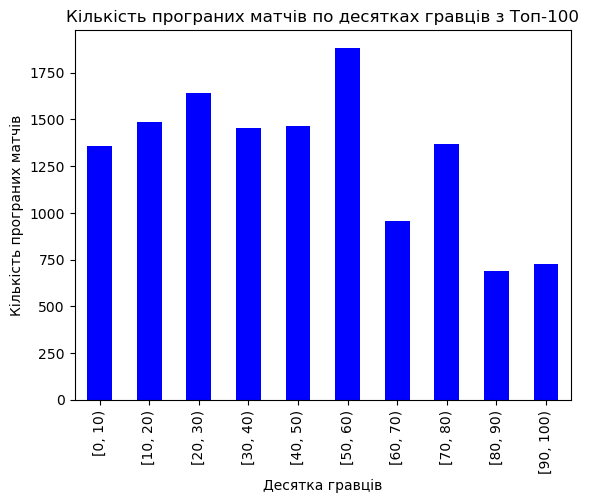

In [21]:
import matplotlib.pyplot as plt

df['Rank Group'] = pd.cut(df['Rank'], bins=range(0, 101, 10), right=False)

lose_matches_by_decade = df.groupby('Rank Group')['Lose'].sum()

lose_matches_by_decade.plot(kind='bar', color='blue')
plt.title('Кількість програних матчів по десятках гравців з Топ-100')
plt.xlabel('Десятка гравців')
plt.ylabel('Кількість програних матчів')
plt.show()

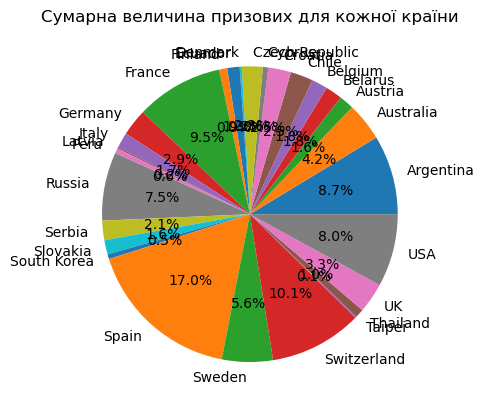

In [22]:
prize_money_by_country = df.groupby('Country')['Prize Money'].sum()

plt.pie(prize_money_by_country, labels=prize_money_by_country.index, autopct='%1.1f%%')
plt.title('Сумарна величина призових для кожної країни')
plt.show()

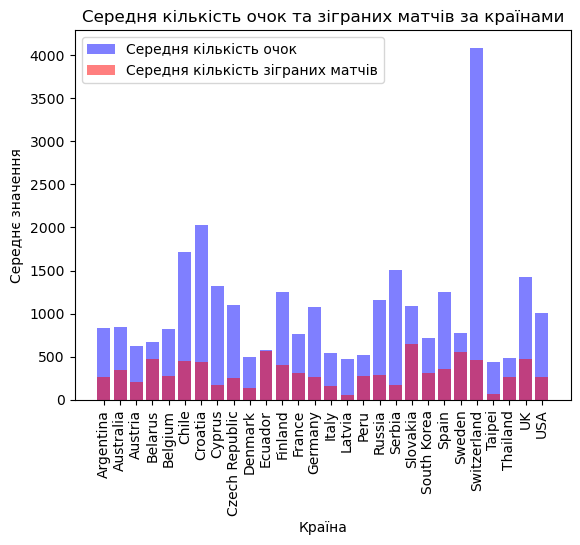

In [23]:
average_pts_by_country = df.groupby('Country')['Pts'].mean()
average_matches_by_country = df.groupby('Country')['Total'].mean()

plt.bar(average_pts_by_country.index, average_pts_by_country, color='b', alpha=0.5, label='Середня кількість очок')
plt.bar(average_matches_by_country.index, average_matches_by_country, color='r', alpha=0.5, label='Середня кількість зіграних матчів')
plt.xlabel('Країна')
plt.ylabel('Середнє значення')
plt.title('Середня кількість очок та зіграних матчів за країнами')
plt.xticks(rotation=90)
plt.legend()
plt.show()